<a href="https://colab.research.google.com/github/yasahiro10/ML_projects/blob/main/Cancer_Classificaiton_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Library Imports**


In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

##**Data Loading & Exploration**


In [2]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"

In [3]:
import requests

# Create a requests session.
session = requests.Session()

# Make a GET request to the dataset link.
response = session.get(path)

# Get the contents of the response.
content = response.content

# Write the contents of the response to a file.
with open('data.csv', 'wb') as f:
  f.write(content)


In [4]:
cell_df=pd.read_csv('data.csv')
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


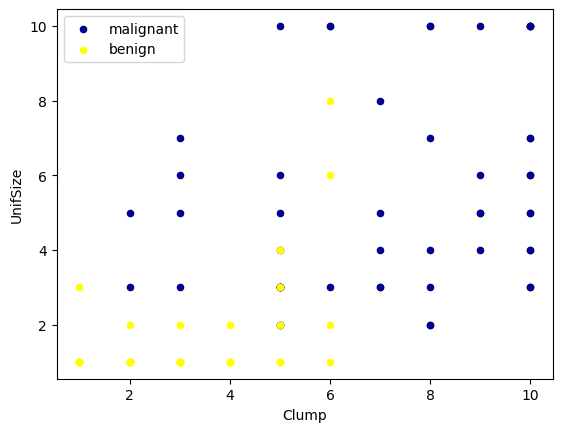

In [5]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [6]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
#It looks like the __BareNuc__ column includes some values that are not numerical. We can drop those rows:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-7-fcd534e7850c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [8]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [9]:
cell_df['Class']=cell_df['Class'].astype('int')
y=np.asarray(cell_df['Class'])
y[0:5]

<ipython-input-9-6c9fd75dcfaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['Class']=cell_df['Class'].astype('int')


array([2, 2, 2, 2, 2])

In [10]:
type(y)

numpy.ndarray

##**Train/test dataset & Modeling (SVM)**

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=4)

In [12]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [13]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC()

In [14]:
yhat=clf.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

##**Evaluation**

In [15]:
from sklearn.metrics import classification_report, confusion_matrix,  jaccard_score, accuracy_score, ConfusionMatrixDisplay


In [16]:
cm = confusion_matrix(y_test, yhat)

accuracy = accuracy_score(y_test,yhat)

# Affichez la précision du modèle
print("Accuracy of SVC :", accuracy)
report = classification_report(y_test, yhat)
print("Report of classification model :\n", report)

Accuracy of SVC : 0.9635036496350365
Report of classification model :
               precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



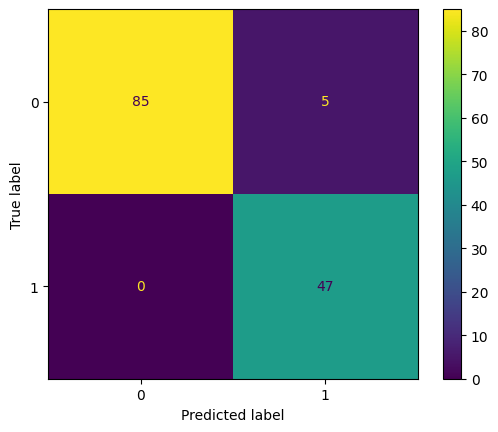

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(kernel='rbf')

# Define the parameter grid you want to search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10],
              'kernel': ['rbf']}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy on Test Set: 0.9635036496350365
